# PROJECT - Recognising Hand Written Digits on MNIST Dataset Using KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Data Preparation

In [2]:
df = pd.read_csv("mnist_train.csv")
print(df.shape)
df.head()

(19999, 785)


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.670,0.671,0.672,0.673,0.674,0.675,0.676,0.677,0.678,7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [3]:
data = df.values
data.shape

(19999, 785)

In [4]:
Y = data[:,784]
X = data[:,:784]

split = int(0.8*X.shape[0])
Y_train = Y[: split]
Y_test = Y[split :]
X_train = X[: split,:]
X_test = X[split :,:]

print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)

(4000, 784)
(15999, 784)
(4000,)
(15999,)


### visualising sample image

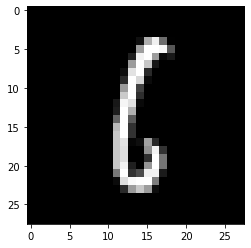

6

In [5]:
def drawimg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
    
drawimg(X_test[111])
Y_test[111]


### KNN MODEL

In [6]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
    
    
def knn(x,y,querypoint,k=5):
    vals=[]
    m=x.shape[0]
    
    for i in range(m):
        d = dist(querypoint,x[i])
        vals.append((d,y[i]))
    vals = sorted(vals)
   
    vals = vals[:k]
    vals = np.array(vals)
    print(vals)
    new_vals = np.unique(vals[:,1], return_counts = True)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    
    return pred



# Prediction

[[1387.44837742    2.        ]
 [1468.66572099    2.        ]
 [1536.08137805    2.        ]
 [1543.55919874    2.        ]
 [1553.45421561    2.        ]]
PREDICTED VALUE =  2.0


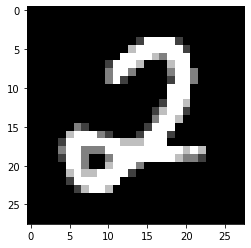

2


In [7]:

pred = knn(X_train,Y_train,X_test[4])
print("PREDICTED VALUE = ",pred)
drawimg(X_test[4])
print(Y_test[4])